# Ricardo Murillo Jiménez 2018173697
# Ronald Esquivel López 2018093269

***

# Instituto Tecnológico de Costa Rica (ITCR)
# Sede Interuniversitaria de Alajuela
# Escuela de Computación
# Curso: Inteligencia Artificial

María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---



Resumen: En el presente trabajo se repasarán conceptos elementales respecto a álgebra lineal.

Todas las funciones y secciones del código deben estar debidamente documentadas. 

---


In [1]:
'''
imports
'''
import torch as torch

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Pregunta 1. Vectores (15 puntos, 5 puntos / cu)

---

Sean los siguientes vectores:

$\vec{v}_{1}=\begin{bmatrix}-0.3\\
0.8\\
0.1
\end{bmatrix}, \vec{v}_{2}=\begin{bmatrix}0.5\\
0.2\\
0.4
\end{bmatrix} y \vec{v}_{3}=\begin{bmatrix}\frac{1}{\sqrt{2}}\\
\frac{-1}{\sqrt{2}}\\
0
\end{bmatrix} $

Resuelva los siguientes ejercicios:

a) Graficación de vectores. Usando Python grafique juntos los vectores anteriores (puede utilizar la función quiver). 

b) Implemente una función que recibe tensores de Pytorch y calcula el ángulo en grados entre esos tensores. Pruebe su función calculando el ángulo entre los vectores $\vec{v}_{1}y \vec{v}_{2,}\vec{v}_{2}$ y $\vec{v}_{3}$. Implemente la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca (es decir deben programar la fórmula del cálculo del ángulo).

c) Calcule la distancia en $\ell_{1}$y$\ell_{2}$ entre los vectores $\vec{v}_{1}$y$\vec{v}_{2,}\vec{v}_{2}y\vec{v}_{3}$, implementando la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca. Compare el resultado obtenido con el uso de la función torch.norm.


***

a) Graficación de vectores. Usando Python grafique juntos los vectores anteriores (puede utilizar la función quiver). 

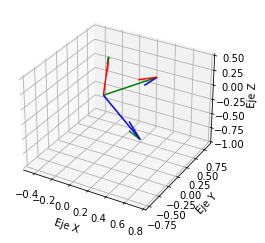

In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np 
import math

# Creación de los vectores dados como tensores
v1 = torch.tensor( [-0.3 , 0.8, 0.1])
v2 = torch.tensor( [0.5 , 0.2, 0.4])
v3 = torch.tensor( [1/math.sqrt(2) , -1/math.sqrt(2), 0])

# Cada uno de los siguientes tensores sumarizan los valores x,y y z de los vectores anteriores
x = torch.tensor( [-0.3 , 0.5, 1/math.sqrt(2)])
y = torch.tensor( [ 0.8 , 0.2, -1/math.sqrt(2) ])
z = torch.tensor( [0.1 , 0.4, 0])

# Creamos la figura de dibujo 3d
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection = '3d')
# graficamos
origen = 0 # Origin de los 3 vectores tienen inicio en 000
ax.quiver(origen, origen, origen, x, y, z, color=['r','g','b'])
# Seteamos los límites del dibujo
ax.set_xlim([-0.5, 0.8])
ax.set_ylim([-0.8, 0.9])
ax.set_zlim([-1, 0.5])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
# ax.view_init(3, 0)
plt.show()

b) Implemente una función que recibe tensores de Pytorch y calcula el ángulo en grados entre esos tensores. Pruebe su función calculando el ángulo entre los vectores $\vec{v}_{1}y \vec{v}_{2,}\vec{v}_{2}$ y $\vec{v}_{3}$. Implemente la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca (es decir deben programar la fórmula del cálculo del ángulo).

In [3]:
#If vectors a = [xa, ya, za], b = [xb, yb, zb], then:
#α = arccos[(xa * xb + ya * yb + za * zb) / (√(xa2 + ya2 + za2) * √(xb2 + yb2 + zb2))]

'''
Función Para calcular el producto punto de 2 Vectores
A[1]*B[1] + A[2]*B[2] + A[3]*B[3]
'''
def prod_punto(A, B): # Siendo A y B vectores; o tensores de pytorch
    prod_punto = 0
    for x in range(len(A)):
        prod_punto += A[x]*B[x]
    return prod_punto

'''
Función para calcula la magnitud de un vector A
√ [1]^2 + [2]^2 + [3]^2
'''
def magnitud_vector(A):
    sum = 0
    for x in A:
        sum += x**2
    sum = math.sqrt(sum)
    return sum
        
# print(magnitud_vector(A))
# print(magnitud_vector(B))

'''
Función encargada de Calcula el angulo entre dos tensores-vectores
α = arccos[(a · b) / (|a| * |b|)]
1 rad × 180/π = 1 deg
'''
def angle_tensors(A, B):
    pp = prod_punto(A, B)
    mA = magnitud_vector(A)
    mB = magnitud_vector(B)
    alpha = pp / (mA * mB) # = (a · b) / (|a| * |b|)
    alpha = math.acos(alpha)
    alpha *= 180/math.pi 
    return alpha
    
print("--Prueba V1 y V2--------")
print("Sin torch", angle_tensors(v1, v2))
pp = torch.dot(v1 ,  v2 )
cosO = pp / ( torch.norm(v1) * torch.norm(v2) )
print("Ángulo entre x,y con torch=", np.arccos(cosO)*180/math.pi) # Convertir radianes a grados

print()

print("--Prueba V2 y V3--------")
print("Sin torch", angle_tensors(v2, v3))
pp = torch.dot(v2 ,  v3 )
cosO = pp / ( torch.norm(v2) * torch.norm(v3) )
print("Ángulo entre x,y con torch=", np.arccos(cosO)*180/math.pi) # Convertir radianes a grados

--Prueba V1 y V2--------
Sin torch 85.02932355474991
Ángulo entre x,y con torch= tensor(85.0293)

--Prueba V2 y V3--------
Sin torch 71.5650513054548
Ángulo entre x,y con torch= tensor(71.5650)


c) Calcule la distancia en $\ell_{1}$y$\ell_{2}$ entre los vectores $\vec{v}_{1}$y$\vec{v}_{2,}\vec{v}_{2}y\vec{v}_{3}$, implementando la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca. Compare el resultado obtenido con el uso de la función torch.norm.

In [4]:

"""
l1 = Sumatoria de i = 1 hasta n de cada uno de los elementos del vector
"""
def calc_l1(A, B):
    C = A*B
    sum = 0
    for x in C: # para cada x sumamos al resultado final: val abs de x
        sum += abs(x)
    return sum


print("Prueba entre V1 y V2")
norm1 = torch.norm((v1* v2), 1, -1)
print("Distancia L1 (torch) es : ", norm1)
print("Unsando Calc_l1: ", calc_l1(v1,v2))

print()

print("Prueba entre V2 y V3")
norm2 = torch.norm((v2* v3), 1, -1)
print("Distancia L1 (torch) es : ", norm2)
print("Unsando Calc_l1: ", calc_l1(v2,v3))

Prueba entre V1 y V2
Distancia L1 (torch) es :  tensor(0.3500)
Unsando Calc_l1:  tensor(0.3500)

Prueba entre V2 y V3
Distancia L1 (torch) es :  tensor(0.4950)
Unsando Calc_l1:  tensor(0.4950)


In [5]:
"""
Raiz cuadrada de la Sumatoria de i = 1 hasta n de cada uno de los elementos del vector al cuadrado
"""
def calc_l2(A, B):
    c =  A*B
    sum = 0
    for x in c:
        sum += x**2
    sum = torch.sqrt(sum)
    return sum



print("Prueba entre V1 y V2")
norm3 = torch.norm(((v1 * v2)), 2, -1)
print("Distancia L2 con torch: ", norm3)
print("Unsando Calc_l2: ", calc_l2(v1, v2))

print()

print("Prueba entre V2 y V3")
norm4 = torch.norm(((v2 * v3)), 2, -1)
print("Distancia L2 con torch: ", norm4)
print("Unsando Calc_l2: ", calc_l2(v2, v3))

Prueba entre V1 y V2
Distancia L2 con torch:  tensor(0.2229)
Unsando Calc_l2:  tensor(0.2229)

Prueba entre V2 y V3
Distancia L2 con torch:  tensor(0.3808)
Unsando Calc_l2:  tensor(0.3808)


## Pregunta 2. Matrices (10 puntos)

---

### 1) Convolución

a) (5 puntos) Programe manualmente usando tensores de Pytorch, pero sin utilizar funiones predefinidas en la biblioteca, la función convolucion2D que reciba una imagen, un kernel de cualquier tamaño, el tamaño del padding a aplicar y devuelva la imagen resultante de la convolución.

b) (2 puntos) Cargue una imagen de prueba en escala de grises o convierta alguna imagen a escala de grises (adjunte el archivo de imagen de prueba con el archivo del trabajo en un zip).

c) (3 puntos) Investigue qué son los filtros de desenfoque gaussiano y aplique al menos dos kernels de este tipo con diferentes tamaño en su imagen utilizando la función convolucion2D que desarrolló en el punto 1.


In [6]:
#a
from torchvision import transforms

from PIL import Image, ImageOps


def convolucion2D(imagen, k, padding=[0,0,0,0]):
    
    convertidor = transforms.ToTensor()
    t_imagen  = convertidor(imagen)
    
    t_k = torch.Tensor(k)
    
    t_size = t_imagen.size()
    
    t_k_size = t_k.size()
    
    t_out_img = torch.zeros(t_size)
    
    
    for x in range(1, t_size[1]-1):
        for y in range(1, t_size[2]-1):
            suma = 0;
            
            for i in range(-1,t_k_size[0]-1):
                for j in range(-1,t_k_size[1]-1):
                    suma += t_imagen[0][x-i][y-j] * k[i+1][j+1]
                    
            t_out_img[0][x][y] = suma
            
    new_img = transforms.functional.to_pil_image(t_out_img, mode=None)
    
    width, height = new_img.size
  
    new_width = width + padding[0] + padding[1]
    new_height = height + padding[2] + padding[3]
  
    result = Image.new(new_img.mode, (new_width, new_height), (255))
    
    result.paste(new_img, (padding[1], padding[2]))
    
    plt.imshow(np.array(result),cmap='gray', aspect='auto', vmin=0, vmax=255)
    

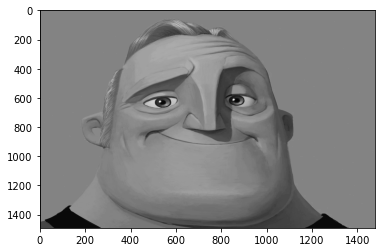

In [7]:
#b
img = Image.open('datos\Incredible.png').convert('L')

plt.imshow(np.array(img),cmap='gray', aspect='auto',vmin=0, vmax=255)


## Filtros de desenfoque gaussiano

Este efecto es el causado por la ***Funcion Gaussiana o Campana de Gauss***.

- Muy usado en software gráfico para reducir el detalle y el ruido de las imágenes
- La idea del suavizado gaussiano es utilizar esta distribución 2-D como una función de "dispersión de puntos", y esto se logra mediante convolución.
- Los coeficientes del kernel disminuyen al aumentar la distancia desde el centro del kernel.
- Los coeficientes del kernel de Gauss dependen del valor de σ (desviación estándar).
- Es posible que los filtros gaussianos no conserven el brillo de la imagen.

### Referencias

University of Auckland. (2010, May 25). Gaussian Filtering [pdf]. University of Auckland. https://www.cs.auckland.ac.nz/courses/compsci373s1c/PatricesLectures/Gaussian%20Filtering_1up.pdf

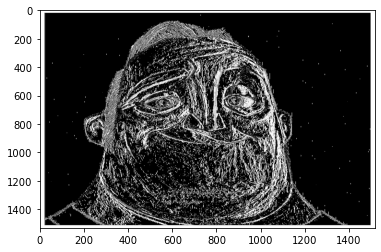

In [8]:
#c.

kernel1 = ((1,0,-1),(1,0,-1),(1,0,-1)) #bordes resaltados

convolucion2D(img,kernel1,[20,20,20,20])


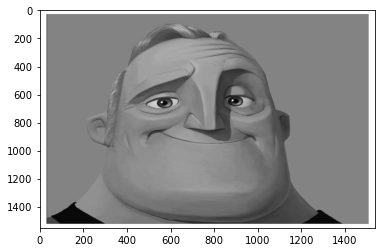

In [9]:
kernel2 = ((0.0625,0.125,0.0625),(0.125,0.25,0.125),(0.0625,0.125,0.0625)) #blur

convolucion2D(img,kernel2,[30,30,30,30])

## Pregunta 3. Auto-valores y auto-vectores (5 puntos)

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   0. &  1. \\
   -2. & -3.
\end{bmatrix}
\end{equation}

a) En una celda de markdown, calcule los auto-valores y autovectores como los ejemplos vistos en clase. Debe presentar todo el procedimiento matemático. 
 
b) En una celda de código y utilizando la función eig de numpy calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide que pueden haber pequeñas diferencias por precisión de la representación numérica).

***

a) En una celda de markdown, calcule los auto-valores y autovectores como los ejemplos vistos en clase. Debe presentar todo el procedimiento matemático. 

### Ejemplo de cálculo de auto valores

El problema general que se tiene radica en tener 2 incógnitas en la ecuación $A\vec{x}=\lambda\vec{x}$. Podemos reescribir la igualdad de la siguiente forma:

$
\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = 0
\end{equation}
$

La igualdad anterior se refiere al espacio nulo de la matriz $(A-\lambda \textrm{I})$. Si la matriz **no** fuera singular, tendría una solución única. Sin embargo, en este caso, debe ser que existen múltiples soluciones, por lo que la matriz debe ser singular. El determinante de una matriz singular es cero, y podemos utilizar esta observación para buscar los valores $\lambda$

\begin{equation}
\textrm{det}(A-\lambda \textrm{I}) = 0
\end{equation}

A manera de ejemplo, dado:

$A=\begin{bmatrix}0 & 1\\ -2 & -3\end{bmatrix}$ 

y 

$\lambda I = \lambda \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$

queremos calcular el determinante de $(A-\lambda \textrm{I})$:

$A-\lambda \textrm{I}=
\begin{bmatrix}0 & 1\\ -2 & -3\end{bmatrix} - \lambda \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$

$A-\lambda \textrm{I}=
\begin{bmatrix}0 & 1\\ -2 & -3\end{bmatrix} -  \begin{bmatrix}\lambda & 0\\ 0 & \lambda\end{bmatrix}$

$A-\lambda \textrm{I}=
\begin{bmatrix} -\lambda & 1\\ -2 & -3-\lambda\end{bmatrix}$ Esto es lo que dentro del determinante

\begin{equation}
\textrm{det}\left(\begin{bmatrix} -\lambda & 1\\ -2 & -3-\lambda\end{bmatrix}\right)=0 \\
-\lambda * (- 3 - \lambda) - (-2) * 1 = 0 \\
3\lambda + \lambda^2 + 2 = 0 \\
\lambda^2 + 3\lambda + 2 = 0 \\
\end{equation}

Sacando las raíces de la equación tenemos que $\lambda_1=-1$ y $\lambda_2=-2$

Nota: recuerden la fórmula cuadrática:
$$ \lambda  = \frac{-b ± \sqrt{b^2 -4ac}}{2a} $$

Es decir:

$$ \lambda  = \frac{-3 ± \sqrt{9-8}}{2} => $$ que las soluciones pueden ser -1 o -2.


In [10]:
"""
Con esto verificamos que la repuestas encontradas en el panel de arriba eran correctas
"""
ecuación = [1., 3., 2.]
solucion = np.roots(ecuación)
print("Sols: ", solucion)

Sols:  [-2. -1.]


## Cálculo de auto vectores a partir de los auto valores
**Buscamos el $x $ con $\lambda_1=-1$**

Sabemos 
$
\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = 0
\end{equation}
$
Con $\lambda$ igual a -1 la matriz resultante de $(A-\lambda \textrm{I})$ es:  

Entonces:
$
\begin{bmatrix}
1 & 1\\
-2 & -2
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}=0
$

Multiplicando tenemos:

$
\begin{equation}
x_1 + x_2 = 0
\end{equation}
$

$
\begin{equation}
-2x_1 - 2x_2 = 0
\end{equation}
$

Esto implica que $x_1 = -x_2$ con lo que una solución puede ser x= (1, -1)



**Buscamos el $x $ con $\lambda_2=-2$**

Entonces:
$
\begin{bmatrix}
2 & 1\\
-2 & -1
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}=0
$

Multiplicando tenemos:

$
\begin{equation}
2x_1 + x_2 = 0
\end{equation}
$

$
\begin{equation}
-2x_1 - 1x_2 = 0
\end{equation}
$

Esto implica que $x_1 = -\frac{x_2}{2}$ con lo que una solución puede ser x=(1,-2)


b) En una celda de código y utilizando la función eig de numpy calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide que pueden haber pequeñas diferencias por precisión de la representación numérica).

In [11]:
import numpy as np
from numpy import linalg as LA

'''
Calcula auto valores y auto vectores
'''
def autovalores_autovectores(A):
    print("A:") # Matriz entrante
    print(A)
    sols, x = LA.eig(A)
    print("sols-autovalores: ")
    print(sols)
    print("x-autovectores: (Normalizados)")
    print(x)
    # Prueba
    print("Probando que: AX = lambdaX")
    print("A*x:")
    Ax = np.matmul(A,x)
    print(Ax)
    print("l*x: ")
    resultado = []
    for i in range(len(sols)):
        columna = sols[i]*x[:,i]
        print(columna)
        resultado.append(columna)
    resultado = np.array(resultado).transpose() # resultado estaba en forma fila y se ocupan auto vectores
    print(resultado)    
    return ((Ax-resultado) < 0.0005)
    

autovalores_autovectores( np.array([[0., 1.0], 
                                    [-2.0, -3.0]]))

# Con lo que podemos verificar la igualdad

A:
[[ 0.  1.]
 [-2. -3.]]
sols-autovalores: 
[-1. -2.]
x-autovectores: (Normalizados)
[[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]
Probando que: AX = lambdaX
A*x:
[[-0.70710678  0.89442719]
 [ 0.70710678 -1.78885438]]
l*x: 
[-0.70710678  0.70710678]
[ 0.89442719 -1.78885438]
[[-0.70710678  0.89442719]
 [ 0.70710678 -1.78885438]]


array([[ True,  True],
       [ True,  True]])

## Pregunta 4. PCA (20 puntos)

---

Para realizar el PCA se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.  

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. La edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones (también adjunto):

a) (2 puntos) Cargue el archivo, muestre el contenido del conjunto de datos de manera que se tenga claro qué atributos tiene y el tipo de dato de cada uno. Luego aplique la normalización o estandarización a los atributos, muestre los atributos luego de este proceso.

Para visualizar mejor los resultados se debe crear rangos sobre la columna Rings. Por ejemplo, los rangos podrían definirse de la siguiente forma, de 1 a 10 anillos el especímen es joven, de 11 a 20 anillos es un adulto-joven y más de esa cantidad de anillos es un adulto. Cree una nueva columna con esos resultados y utilice esta nueva columna como target.

b) (1 puntos) Despliegue datos estadísticos como la media, desviación estándar, entre otros.

c) (1 puntos) Explore y visualice la relación de los datos utilizando gráficos de dispersión.

d) (2 puntos) Despliegue un mapa de calor de los datos.

e) (7 puntos) Aplíquele la técnica del PCA. Grafice la varianza explicada y los componentes principales (como el ejemplo visto en clase).

f) (7 puntos) A partir del resultado anterior, seleccione los dos primeros componentes, proyecte el conjunto de datos en estos dos componentes y grafique los valores proyectados en esos dos componentes principales.




***

a) (2 puntos) Cargue el archivo, muestre el contenido del conjunto de datos de manera que se tenga claro qué atributos tiene y el tipo de dato de cada uno. Luego aplique la normalización o estandarización a los atributos, muestre los atributos luego de este proceso.

Para visualizar mejor los resultados se debe crear rangos sobre la columna Rings. Por ejemplo, los rangos podrían definirse de la siguiente forma, de 1 a 10 anillos el especímen es joven, de 11 a 20 anillos es un adulto-joven y más de esa cantidad de anillos es un adulto. Cree una nueva columna con esos resultados y utilice esta nueva columna como target.

In [12]:
# Bibliotecas requeridas para el ejercicio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import torch as torch

# Para graficar estadística
import seaborn as sns

In [13]:
#Carga de los datos de Abalone
df = pd.read_csv('datos/Abalone.csv')
df

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.7000,17
1,0.740,0.600,0.195,1.9740,0.4085,0.7100,16
2,0.735,0.590,0.225,1.7560,0.3405,0.5800,21
3,0.730,0.595,0.230,2.8255,0.4190,0.8970,17
4,0.725,0.560,0.210,2.1410,0.3980,1.0050,18
...,...,...,...,...,...,...,...
982,0.155,0.105,0.050,0.0175,0.0035,0.0050,4
983,0.150,0.100,0.025,0.0150,0.0040,0.0050,2
984,0.130,0.100,0.030,0.0130,0.0030,0.0040,3
985,0.110,0.090,0.030,0.0080,0.0020,0.0030,3


In [14]:
'''
Mostramos los atributos del Dataset y el tipo de dato de cada uno
'''
df.dtypes

Length         float64
Diameter       float64
Height         float64
Whole          float64
Viscera        float64
Shellweight    float64
Rings            int64
dtype: object

In [15]:
'''
Buscamos las estadísticas de los datos como la media, valor mínimo, etc.
'''
df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.489630,0.383678,0.133131,0.712899,0.155166,0.218105,19.567376
std,0.120444,0.101893,0.039270,0.454114,0.097596,0.144131,290.580810
min,0.075000,0.055000,0.010000,0.002000,0.000500,0.001500,-1300.000000
25%,0.415000,0.322500,0.105000,0.354500,0.074000,0.105000,8.000000
50%,0.505000,0.400000,0.135000,0.663000,0.146000,0.200000,10.000000
75%,0.580000,0.455000,0.160000,0.996500,0.220250,0.305000,13.000000
max,0.745000,0.600000,0.240000,2.825500,0.541000,1.005000,9000.000000


Para trabajar de una vez con datos reales, vamos a eliminar los datos  atípicos

In [16]:
# las mayores anomalías se encuentran en la columna rings, por lo que que podemos acotar la misma
"""
Después de eliminar datos atípicos
Se eliminaron 3 Filas
"""
df=df[df.Rings <= 500]
df=df[df.Rings >= 0]
df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,984.000000,984.000000,984.00000,984.000000,984.000000,984.000000,984.000000
mean,0.489497,0.383562,0.13311,0.712611,0.155069,0.218114,10.887195
std,0.120571,0.101995,0.03931,0.454486,0.097689,0.144328,4.079136
min,0.075000,0.055000,0.01000,0.002000,0.000500,0.001500,1.000000
25%,0.415000,0.320000,0.10500,0.353375,0.073500,0.105000,8.000000
50%,0.505000,0.400000,0.13500,0.663750,0.145750,0.200000,10.000000
75%,0.580000,0.455000,0.16000,0.996250,0.220125,0.305000,13.000000
max,0.745000,0.600000,0.24000,2.825500,0.541000,1.005000,29.000000


In [17]:
#La PCA se ve afectado por la diferencia de escala de los datos, por lo que deben escalar las características antes de aplicar PCA. 
dfEscalado = (df - df.mean()) / df.std(ddof=1)
print("Tamaño del dataframe: ", dfEscalado.shape)
print(dfEscalado)

# Se calcula los auto-valores y auto-vectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(dfEscalado.cov())

# Se normalizan los datos
eigenvalues_normalized = eigenvalues / eigenvalues.sum()

print("Auto-valores:")
print(eigenvalues)

print("Auto-vectores:")
print( eigenvectors)

print("Auto-valores normalizados:")
print(eigenvalues_normalized)


Tamaño del dataframe:  (984, 7)
       Length  Diameter    Height     Whole   Viscera  Shellweight     Rings
0    2.119116  1.974988  2.083172  3.930568  3.244289     3.338817  1.498554
1    2.077647  2.122055  1.574400  2.775418  2.594267     3.408104  1.253404
2    2.036177  2.024010  2.337558  2.295755  1.898181     2.507379  2.479154
3    1.994708  2.073032  2.464751  4.648961  2.701751     4.703761  1.498554
4    1.953238  1.729877  1.955979  3.142865  2.486783     5.452056  1.743704
..        ...       ...       ...       ...       ...          ...       ...
982 -2.774284 -2.731146 -2.114195 -1.529443 -1.551542    -1.476595 -1.688396
983 -2.815753 -2.780168 -2.750159 -1.534943 -1.546423    -1.476595 -2.178696
984 -2.981631 -2.780168 -2.622967 -1.539344 -1.556660    -1.483523 -1.933546
985 -3.147509 -2.878212 -2.622967 -1.550345 -1.566897    -1.490452 -1.933546
986 -3.437796 -3.221368 -3.131738 -1.563547 -1.582251    -1.500845 -2.423846

[984 rows x 7 columns]
Auto-valores:
[6.096

In [18]:
'''
Primera Infancia (0-5 años)
Infancia (6 - 11 años)
Adolescencia (12 - 18 años)
Juventud (14 - 26 años)
Adultez (27- 59 años)
Persona Mayor (60 años o mas) envejecimiento y vejez.
'''
def create_ranges(x):
    if(x <= 5):
        return 'Joven'
    if(6 <= x <= 10):
        return 'Adolescente'
    if(11 <= x <= 15):
        return 'Adulto'
    if(16 <= x <= 20):
        return 'Maduro'
    if(x > 20):
        return 'Anciano'

In [19]:
# Creación de la columna target; usada más adelante
RR = pd.DataFrame(df.Rings, columns=['Rings']) # Se crea un dataframe con la columna de Rings (RR :  Rangos Rings)
print("Y", RR)

Rangos = []

for x in df.Rings:
    Rangos.append(create_ranges(x))


RR['Rangos'] = Rangos
print("Y", RR)
    

Y      Rings
0       17
1       16
2       21
3       17
4       18
..     ...
982      4
983      2
984      3
985      3
986      1

[984 rows x 1 columns]
Y      Rings   Rangos
0       17   Maduro
1       16   Maduro
2       21  Anciano
3       17   Maduro
4       18   Maduro
..     ...      ...
982      4    Joven
983      2    Joven
984      3    Joven
985      3    Joven
986      1    Joven

[984 rows x 2 columns]


b) (1 puntos) Despliegue datos estadísticos como la media, desviación estándar, entre otros.


In [20]:
df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,984.000000,984.000000,984.00000,984.000000,984.000000,984.000000,984.000000
mean,0.489497,0.383562,0.13311,0.712611,0.155069,0.218114,10.887195
std,0.120571,0.101995,0.03931,0.454486,0.097689,0.144328,4.079136
min,0.075000,0.055000,0.01000,0.002000,0.000500,0.001500,1.000000
25%,0.415000,0.320000,0.10500,0.353375,0.073500,0.105000,8.000000
50%,0.505000,0.400000,0.13500,0.663750,0.145750,0.200000,10.000000
75%,0.580000,0.455000,0.16000,0.996250,0.220125,0.305000,13.000000
max,0.745000,0.600000,0.24000,2.825500,0.541000,1.005000,29.000000


c) (1 puntos) Explore y visualice la relación de los datos utilizando gráficos de dispersión.

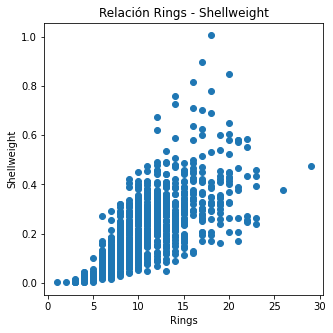

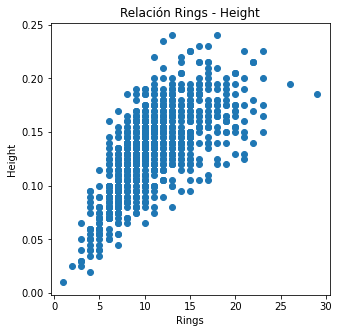

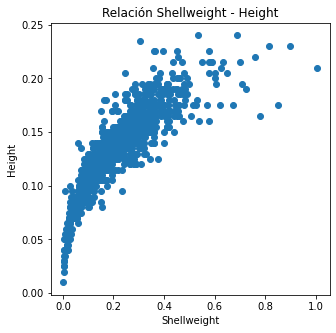

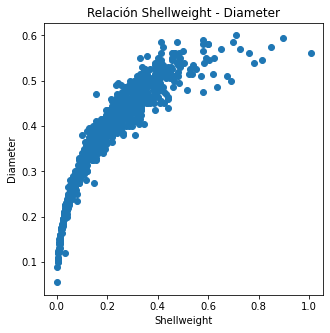

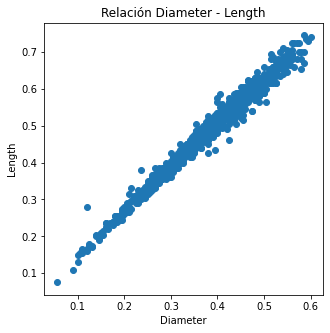

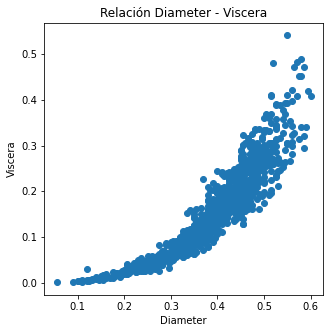

In [21]:
# Función para gráficar graficos de dispersión
def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    plt.figure(figsize=(5,5))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    # plt.gca().invert_xaxis()
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(df,'Rings', 'Shellweight', 'Rings','Shellweight',
          'Relación Rings - Shellweight') 


plot_data(df,'Rings', 'Height', 'Rings','Height',
          'Relación Rings - Height') 


plot_data(df,'Shellweight', 'Height', 'Shellweight','Height',
          'Relación Shellweight - Height') 

plot_data(df,'Shellweight', 'Diameter', 'Shellweight','Diameter',
          'Relación Shellweight - Diameter') 


plot_data(df,'Diameter', 'Length', 'Diameter','Length',
          'Relación Diameter - Length') 

plot_data(df,'Diameter', 'Viscera', 'Diameter','Viscera',
          'Relación Diameter - Viscera') 

Figure 1: Se puede ver observar como con más rings, el peso del shell, va aumentando y expandiendose.
Figure 2: Muy parecido a la anterior, se va expandiendo poco a poco según la cantidad de rings.
Figure 3: Al principio el peso del abalon no aumenta considerablemente mientras sí lo hace su altura.
Figure 4: Pasa lo mismo que con el anterior, pero con el peso del abalon y el diametro del mismo.
Figure 5: El diametro y la longitud llevan una relación básicamente lineal.
Figure 6: Al principio el diametro aumenta bastantante en comparación al la viscera, y después al contrarlio. exponencial.

d) (2 puntos) Despliegue un mapa de calor de los datos.

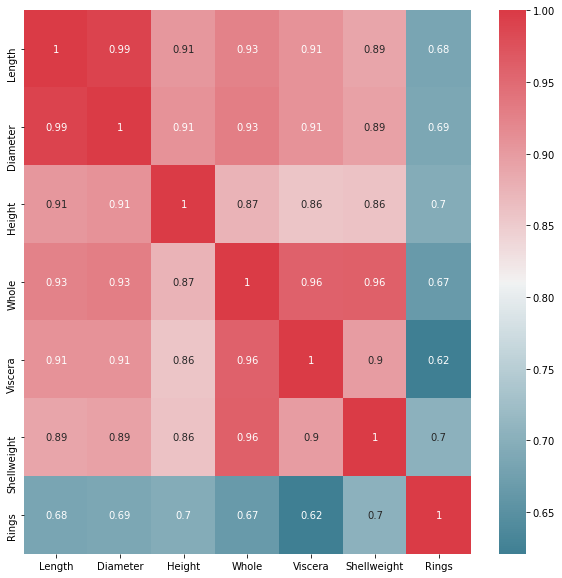

In [22]:
# Función para dibujar gráficos de calor.
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(10,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)

# mapa calor del dataframe de avalons
correlation_heatmap(df)

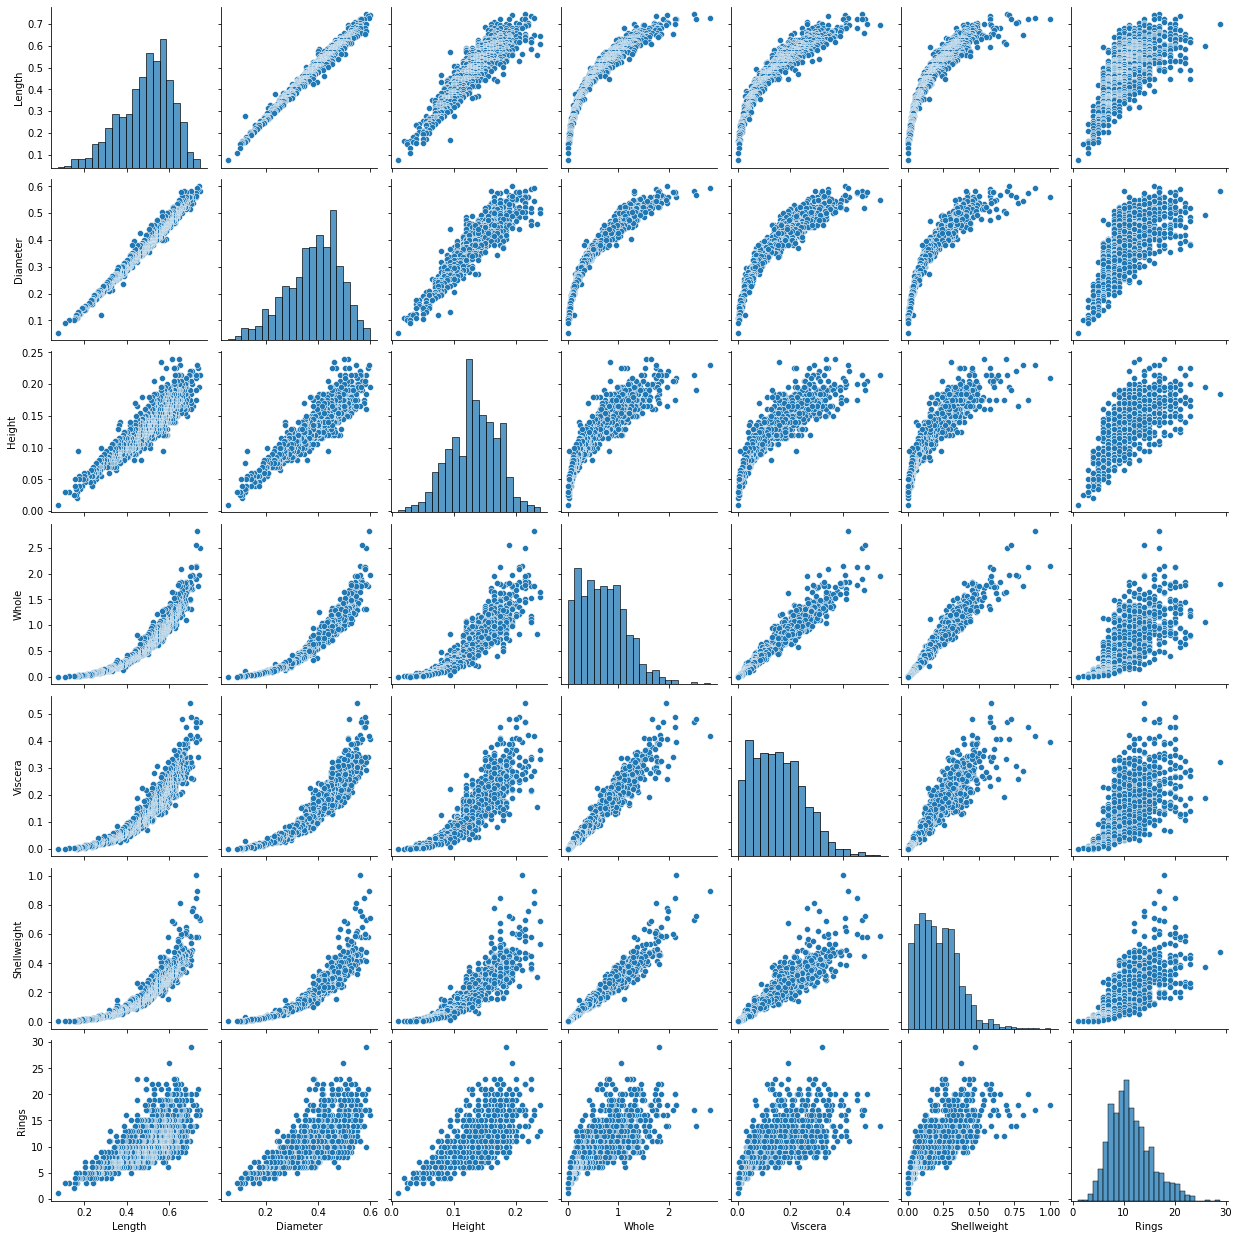

In [23]:
# Relación entre todas las variables y sus compañeras
sns.pairplot(df);


e) (7 puntos) Aplíquele la técnica del PCA. Grafice la varianza explicada y los componentes principales (como el ejemplo visto en clase).

In [24]:
# Se calcula la varianza explicada
# La varianza explicada indica cuánta información (varianza) 
#se puede atribuir a cada uno de los componentes principales.
var_explicada = np.cumsum(eigenvalues_normalized)
print("Varianza explicada acumulada:")
print( var_explicada )

Varianza explicada acumulada:
[0.87099627 0.93917857 0.96666713 0.98340984 0.99594284 0.99739026
 1.        ]


In [25]:
# Proyecta los datos
T = pd.DataFrame(dfEscalado.dot(eigenvectors))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7']

# agrega la etiqueta de las especies
T = pd.concat([T, RR.Rangos], axis=1)

print("Parte de las muestras proyectadas")
print(T)

Parte de las muestras proyectadas
          pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    6.944929  0.842767  1.638238 -0.416679 -0.169675 -0.174967  0.489731   
1    6.040349  0.698478  1.276483 -0.100777  0.486833  0.038362 -0.257089   
2    5.849943 -0.769670  0.195887 -0.353127  0.178256 -0.036036  0.056417   
3    7.681239  0.892960  2.214147 -1.236767  0.943302 -0.088677  0.711426   
4    7.026411  0.317327  2.385296 -1.203600  1.490533 -0.155355 -0.778021   
..        ...       ...       ...       ...       ...       ...       ...   
982 -5.256075  0.143968  1.128400 -0.626093 -0.288988  0.006368  0.085041   
983 -5.684674  0.586971  1.464407 -0.259640 -0.146050  0.012875  0.047450   
984 -5.634119  0.335440  1.465241 -0.394161 -0.227161  0.124020  0.080790   
985 -5.748774  0.298763  1.543943 -0.503666 -0.278013  0.168046  0.094995   
986 -6.357479  0.670407  1.978502 -0.452459 -0.260864  0.131635  0.087408   

      Rangos  
0     Maduro  
1     Madur

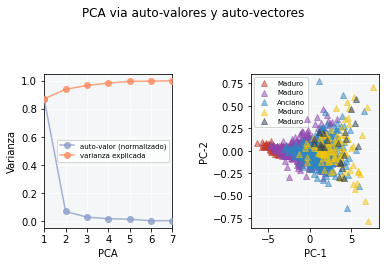

In [26]:
"""
Gráfico de la Izquierda
"""

# Etiquetas
Rangos = [T[T.Rangos=='Joven'],
          T[T.Rangos=='Adolescente'], 
          T[T.Rangos=='Adulto'], 
          T[T.Rangos=='Maduro'], 
          T[T.Rangos=='Anciano']]

# Colores para Rangos de edades
colors = ['#C0392B', '#8E44AD', '#2E86C1', '#F1C40F', '#2E4053']

_, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4,5,6,7],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4,5,6,7],
         var_explicada,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(1., 5)
ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

"""
Gráfico de la Derecha
"""
# Usa solo dos componentes principales, pc1 y pc2
for group, color in zip(Rangos, colors):
    ax2.scatter(group.pc1,
                group.pc7,
                marker='^',
                color=color,
                label=group.pc1,
                alpha=0.5,
                zorder=1000)
ax2.set_xlabel(r'PC-1')
ax2.set_ylabel(r'PC-2')
ax2.grid(color='#fdfefe')
ax2.set_facecolor('#f4f6f7')
ax2.legend(labels=T.Rangos, fontsize=7)

plt.suptitle(r'PCA via auto-valores y auto-vectores')
plt.tight_layout(pad=3.0)
plt.show() 

f) (7 puntos) A partir del resultado anterior, seleccione los dos primeros componentes, proyecte el conjunto de datos en estos dos componentes y grafique los valores proyectados en esos dos componentes principales.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(dfEscalado)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Componente Principal 1', 'Componente Principal 2'])

In [28]:
# Se grega la columna del target en este caso los rangos
DataFrameFinal = pd.concat([principalDf, RR[['Rangos']]], axis = 1)

print("Componentes principales PC1 y PC2")
print(DataFrameFinal)

Componentes principales PC1 y PC2
     Componente Principal 1  Componente Principal 2   Rangos
0                  6.944929               -0.842767   Maduro
1                  6.040349               -0.698478   Maduro
2                  5.849943                0.769670  Anciano
3                  7.681239               -0.892960   Maduro
4                  7.026411               -0.317327   Maduro
..                      ...                     ...      ...
982               -5.748774               -0.298763    Joven
983               -6.357479               -0.670407    Joven
984                     NaN                     NaN    Joven
985                     NaN                     NaN    Joven
986                     NaN                     NaN    Joven

[987 rows x 3 columns]


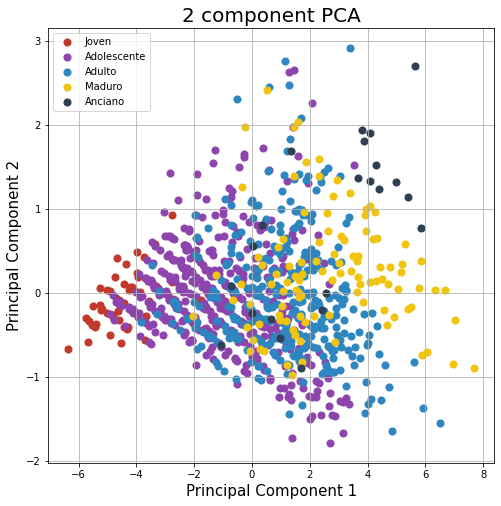

In [30]:
#Grafico 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Joven', 'Adolescente', 'Adulto', 'Maduro', 'Anciano']
colors = ['#C0392B', '#8E44AD', '#2E86C1', '#F1C40F', '#2E4053']
for target, color in zip(targets,colors):
    indicesToKeep = DataFrameFinal['Rangos'] == target
    ax.scatter(DataFrameFinal.loc[indicesToKeep, 'Componente Principal 1']
               , DataFrameFinal.loc[indicesToKeep, 'Componente Principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Pregunta 5. Graficación (5 puntos)

---

Para las siguientes funciones:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente:

En python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en python genere dos gráficos, uno para cada función (𝑓1 y 𝑓2). 

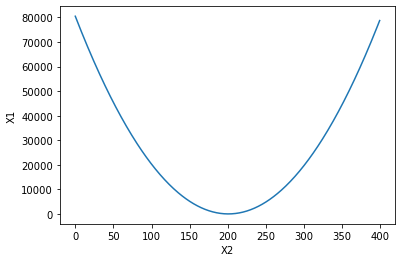

In [37]:
import math
#a
def f1_aux(x1, x2):
    return pow((x1 - 0.7),2) + pow((x2 - 0.5),2)


def f1(minimo, maximo,   func): #numero minimo y maximo
    a = range(minimo, maximo)
    aprox_ys = [func(x,x) for x in a]
    plt.plot(aprox_ys,label='Resultado')
    plt.ylabel('X1')
    plt.xlabel('X2')
    plt.show()   
f1(-200, 200, f1_aux)

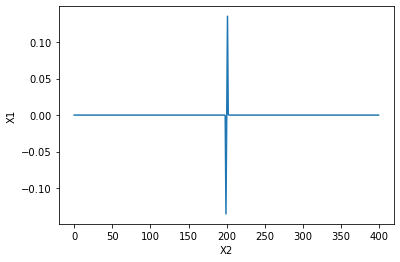

In [38]:
#b
def f2_aux(x1, x2):
    return (x1 * math.exp(-pow(x1,2)-pow(x2,2)))



f1(-200, 200, f2_aux)

## Pregunta 6. Optimización (25 puntos)
---

**a) Vector gradiente  (5 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. Además, evalúelo en $\begin{bmatrix}1\\1\end{bmatrix}$ y $\begin{bmatrix}-1\\-1\end{bmatrix}$. 

--No se require programación en python--.

 - $f(x,y) = x^4+y^3+5x^2y^3$
 
---

Para calcular el vector gradiente de una función primero se realiza el cálculo de la derivada en cada uno de los elementos, como la función son sumas, se separan las derivadas para cada elemento de la suma. Derivando la funcion en ***x*** y en ***y***.

$$f_x =  \frac{d}{dx}(x^4+y^3+5x^2y^3)  =  \frac{d}{dx}(x^4)+\frac{d}{dx}(y^3)+\frac{d}{dx}(5x^2y^3)= 4x + 10xy^3$$
 
---

$$f_y =  \frac{d}{dy}(x^4+y^3+5x^2y^3)=  \frac{d}{dy}(x^4)+\frac{d}{dy}(y^3)+\frac{d}{dy}(5x^2y^3)= (15x^2 + 3)y^2 = 3y^2 + 15x^2y^2$$

---

Por lo tanto el vector gradiente es el siguiente: $$\begin{bmatrix}4x + 10xy^3\\3y^2 + 15x^2y^2\end{bmatrix}$$

Evaluado en $\begin{bmatrix}1\\1\end{bmatrix}$ quedaría de la siguiente manera:
$$\begin{bmatrix}4(1) + 10(1)(1)^3 = 14\\3(1)^2 + 15(1)^2(1)^2 = 18\end{bmatrix} = \begin{bmatrix}14\\18\end{bmatrix}$$

Evaluado en $\begin{bmatrix}-1\\-1\end{bmatrix}$ quedaría de la siguiente manera:
$$\begin{bmatrix}4(-1) + 10(-1)(-1)^3 = 6 \\ 3(-1)^2 + 15(-1)^2(-1)^2 = 18\end{bmatrix} = \begin{bmatrix}6\\18\end{bmatrix}$$

**Sea la función:** 

\begin{equation}
f2\left(\overrightarrow{x}\right)=(x-0.7)^{2}+(y-0.5)^{2},
\end{equation}


**b) Descenso de gradiente**



**Implemente el algoritmo de descenso de gradiente para f2(x) en la función en python denominada: (8 puntos)**

$$funcion\_gradient\_descent \left(tasa\_aprendizaje, iteraciones, xy, tolerancia\right)$$

donde los parámetros corresponden a:

* tasa_aprendizaje: es el $\alpha$
* iteraciones: es el máximo número de iteraciones a ejecutar
* xy: es el vector con los dos valores iniciales [x,y]
* tolerancia: es el valor mínimo para un cambio entre iteración. 

Despliegue y analice los resultados (2 punto).



---
**c) Implemente el algoritmo de Newton-Raphson, para la función f2(x)**

- Implemente el algoritmo (8 puntos)
- Despliegue y analice los resultados (2 puntos)


Los valores que se obtienen son: 0.6999999623536759 0.5000000163035262 en pasos 87


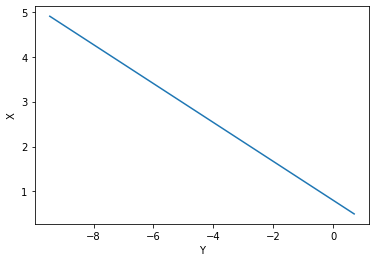

In [40]:
#b

def funcion_gradient_descent(tasa_aprendizaje,iteraciones,xy,tolerancia):
    # Proceso iterativo
    x = xy[0]
    y = xy[1]
    resultados_x = []
    resultados_y = []
    for paso in range(0, iteraciones):
        x_gradiente = (10*x - 7)/5  #derivada de la funcion en x
        y_gradiente = 2*y-1 #derivada de la funcion en y
        x = x - (tasa_aprendizaje * x_gradiente)
        y = y - (tasa_aprendizaje * y_gradiente)
        resultados_x.append(x)
        resultados_y.append(y)
        if max(abs(tasa_aprendizaje * x_gradiente), abs(tasa_aprendizaje * y_gradiente)) < tolerancia:
            break

    # Impresión de los resultados
    print("Los valores que se obtienen son:", x, y, "en pasos", paso)
    
    plt.plot(resultados_x,resultados_y)
    plt.ylabel('X')
    plt.xlabel('Y')
    plt.show()
    
    
funcion_gradient_descent(0.10,100,[-12,6],1e-8)

Los valores que se obtienen son: 0.6999999959577566 0.5000000017505778 en pasos 97


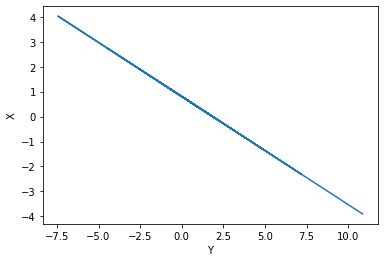

In [41]:
funcion_gradient_descent(0.9,100,[-12,6],1e-8)

Como se puede ver, si se dan pasos agigantados van a ver veces que la linea se va a regresar, en este caso se aprecia que con 0.9 de tasa de aprendizaje comparado con 0.1. El algoritmo pasa muchas veces por donde ya pasó dando a ver que la línea es "más gruesa", pero en realidad es que se dibujo varias veces en un mismo sector.

Los valores que se obtienen son x y y respectivamente: 0.5989361702127642 0.5989361702127642 en pasos 10


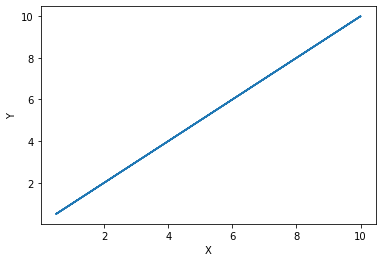

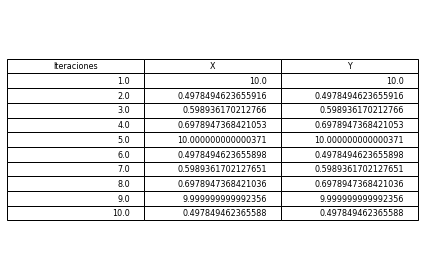

In [43]:
import pandas as pd

def NewtonRaphson(xy,iteraciones,tolerancia):
    x = xy[0]
    y = xy[1]
    resultados_x = []
    resultados_y = []
    resultados = []
    
    for i in range(0,iteraciones):
        f_xy = pow((x - 0.7), 2) + pow((y - 0.5), 2) #funcion sin derivar
        
        f_x_derivada = (10*x - 7)/5  #derivada de la funcion en x
        f_y_derivada = 2*y-1 #derivada de la funcion en y
        
        x0 = x - f_xy / f_x_derivada
        y0 = y - f_xy / f_y_derivada
        
        resultados_x.append(x)
        resultados_y.append(y)
        resultados.append([i+1,x,y])
        
        if(abs(x0-x)<tolerancia):
            break
        x = x0
        y = x0
        
    # Impresión de los resultados
    print("Los valores que se obtienen son x y y respectivamente:", x,y, "en pasos", i+1)
    
    plt.plot(resultados_x,resultados_y)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()

    fig, ax = plt.subplots()

    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    df = pd.DataFrame(resultados, columns=['Iteraciones','X','Y'])

    ax.table(cellText=df.values, colLabels=df.columns, loc='center')

    fig.tight_layout()

    plt.show()
    
NewtonRaphson([10,10],10,1e-3)


En este caso por ser una derivada separada, se comporta como se espera, ya que si se hace a mano, la raíz de la función concuerda con los datos recibidos. Es una forma muy interesante de calcular la raiz de una función.